In [2]:
# importing necessary libraries

import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import snowflake.connector
from snowflake.snowpark import Session
from snowflake.snowpark import*
from snowflake.snowpark.functions import*
from snowflake.snowpark.types import*

In [3]:
# setting up the connection parameters to access snowflake database

connection_parameters = {
    'account'   :  'cpgkfjy-qg41377',
    'user'      : input('Enter user'),
    'password'  : input('Enter password'),
    'warehouse' : 'COMPUTE_WH'
}

session = Session.builder.configs(connection_parameters).create()

Enter usersajanbs
Enter passwordSnowflake24


In [4]:
session.sql('use database Testing').collect()
session.sql('use schema Testing.public').collect()
print(session.sql('select current_warehouse(),current_database(),current_schema(),current_user(),current_role()').collect())

[Row(CURRENT_WAREHOUSE()='COMPUTE_WH', CURRENT_DATABASE()='TESTING', CURRENT_SCHEMA()='PUBLIC', CURRENT_USER()='SAJANBS', CURRENT_ROLE()='ACCOUNTADMIN')]


In [5]:
# access data and save it to new variable

credits_df = session.table('CREDIT_FILES')

In [6]:
credits_df.schema

StructType([StructField('CREDIT_REQUEST_ID', LongType(), nullable=True), StructField('CREDIT_AMOUNT', LongType(), nullable=True), StructField('CREDIT_DURATION', LongType(), nullable=True), StructField('PURPOSE', StringType(16777216), nullable=True), StructField('INSTALLMENT_COMMITMENT', LongType(), nullable=True), StructField('OTHER_PARTIES', StringType(16777216), nullable=True), StructField('CREDIT_STANDING', StringType(16777216), nullable=True), StructField('CREDIT_SCORE', LongType(), nullable=True), StructField('CHECKING_BALANCE', DoubleType(), nullable=True), StructField('SAVINGS_BALANCE', DoubleType(), nullable=True), StructField('EXISTING_CREDITS', LongType(), nullable=True), StructField('ASSETS', StringType(16777216), nullable=True), StructField('HOUSING', StringType(16777216), nullable=True), StructField('QUALIFICATION', StringType(16777216), nullable=True), StructField('JOB_HISTORY', LongType(), nullable=True), StructField('AGE', LongType(), nullable=True), StructField('SEX', 

In [7]:
credits_df.to_pandas().head()

,CREDIT_REQUEST_ID,CREDIT_AMOUNT,CREDIT_DURATION,PURPOSE,INSTALLMENT_COMMITMENT,OTHER_PARTIES,CREDIT_STANDING,CREDIT_SCORE,CHECKING_BALANCE,SAVINGS_BALANCE,...,ASSETS,HOUSING,QUALIFICATION,JOB_HISTORY,AGE,SEX,MARITAL_STATUS,NUM_DEPENDENTS,RESIDENCE_SINCE,OTHER_PAYMENT_PLANS
0,147,8600,6,Vehicle,1,None,good,466,-728.12,17.0,...,None,own,skilled,15,39,F,Married,1,4,none
1,248,12040,6,Vehicle,4,None,good,202,0.00,2443.0,...,None,rent,skilled,1,35,M,Single,1,1,bank
2,112,3920,15,Tuition,4,None,good,736,4696.00,143.0,...,Investments,rent,skilled,1,23,F,Married,1,4,none
3,222,12000,12,Tuition,4,None,good,732,-25.35,0.0,...,Investments,rent,skilled,3,23,F,Married,1,4,bank
4,162,10550,18,Vehicle,4,None,good,507,0.00,510.0,...,Investments,own,skilled,1,30,F,Married,1,1,none


In [8]:
credits_df.to_pandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CREDIT_REQUEST_ID       2940 non-null   int16  
 1   CREDIT_AMOUNT           2940 non-null   int32  
 2   CREDIT_DURATION         2940 non-null   int8   
 3   PURPOSE                 2940 non-null   object 
 4   INSTALLMENT_COMMITMENT  2940 non-null   int8   
 5   OTHER_PARTIES           2940 non-null   object 
 6   CREDIT_STANDING         2940 non-null   object 
 7   CREDIT_SCORE            2940 non-null   int16  
 8   CHECKING_BALANCE        2940 non-null   float64
 9   SAVINGS_BALANCE         2940 non-null   float64
 10  EXISTING_CREDITS        2940 non-null   int8   
 11  ASSETS                  2940 non-null   object 
 12  HOUSING                 2940 non-null   object 
 13  QUALIFICATION           2940 non-null   object 
 14  JOB_HISTORY             2940 non-null   

In [9]:
credits_df.to_pandas().describe()

,CREDIT_REQUEST_ID,CREDIT_AMOUNT,CREDIT_DURATION,INSTALLMENT_COMMITMENT,CREDIT_SCORE,CHECKING_BALANCE,SAVINGS_BALANCE,EXISTING_CREDITS,JOB_HISTORY,AGE,NUM_DEPENDENTS,RESIDENCE_SINCE
count,2940.000000,2940.000000,2940.000000,2940.00000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1502.253061,32593.571429,20.885034,2.97449,603.929592,344.497456,1792.042813,1.406803,5.726531,35.914286,1.155442,2.847279
std,865.281708,27992.343428,12.049816,1.11702,149.279673,1065.638529,3559.675237,0.575520,6.589818,11.246207,0.362387,1.103742
min,1.000000,2500.000000,4.000000,1.00000,200.000000,-999.460000,0.000000,1.000000,0.000000,19.000000,1.000000,1.000000
25%,753.750000,13660.000000,12.000000,2.00000,495.750000,-85.857500,106.000000,1.000000,1.000000,27.000000,1.000000,2.000000
50%,1502.500000,23150.000000,18.000000,3.00000,679.000000,0.000000,510.500000,1.000000,3.000000,34.000000,1.000000,3.000000
75%,2250.250000,39720.000000,24.000000,4.00000,714.000000,618.000000,935.000000,2.000000,7.000000,42.000000,1.000000,4.000000
max,3000.000000,184240.000000,72.000000,4.00000,799.000000,4992.000000,19956.000000,4.000000,25.000000,75.000000,2.000000,4.000000


In [10]:
credits_df.to_pandas()

,CREDIT_REQUEST_ID,CREDIT_AMOUNT,CREDIT_DURATION,PURPOSE,INSTALLMENT_COMMITMENT,OTHER_PARTIES,CREDIT_STANDING,CREDIT_SCORE,CHECKING_BALANCE,SAVINGS_BALANCE,...,ASSETS,HOUSING,QUALIFICATION,JOB_HISTORY,AGE,SEX,MARITAL_STATUS,NUM_DEPENDENTS,RESIDENCE_SINCE,OTHER_PAYMENT_PLANS
0,147,8600,6,Vehicle,1,None,good,466,-728.12,17.00,...,None,own,skilled,15,39,F,Married,1,4,none
1,248,12040,6,Vehicle,4,None,good,202,0.00,2443.00,...,None,rent,skilled,1,35,M,Single,1,1,bank
2,112,3920,15,Tuition,4,None,good,736,4696.00,143.00,...,Investments,rent,skilled,1,23,F,Married,1,4,none
3,222,12000,12,Tuition,4,None,good,732,-25.35,0.00,...,Investments,rent,skilled,3,23,F,Married,1,4,bank
4,162,10550,18,Vehicle,4,None,good,507,0.00,510.00,...,Investments,own,skilled,1,30,F,Married,1,1,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2311,53810,48,Other,3,None,good,726,1505.00,0.00,...,None,free,unemployed,0,40,M,Single,1,4,bank
2936,2775,14800,12,Vehicle,2,None,good,343,4486.00,7361.86,...,None,free,unemployed,0,66,M,Single,1,4,bank
2937,2188,11750,16,Vehicle,2,None,good,396,720.00,460.00,...,Vehicle,free,unemployed,0,68,M,Single,1,3,none
2938,2000,45760,45,Vehicle,3,None,good,523,752.00,1444.00,...,Vehicle,own,skilled,0,27,M,Single,1,4,none


# visualization

array([[<Axes: title={'center': 'CREDIT_REQUEST_ID'}>,
        <Axes: title={'center': 'CREDIT_AMOUNT'}>,
        <Axes: title={'center': 'CREDIT_DURATION'}>],
       [<Axes: title={'center': 'INSTALLMENT_COMMITMENT'}>,
        <Axes: title={'center': 'CREDIT_SCORE'}>,
        <Axes: title={'center': 'CHECKING_BALANCE'}>],
       [<Axes: title={'center': 'SAVINGS_BALANCE'}>,
        <Axes: title={'center': 'EXISTING_CREDITS'}>,
        <Axes: title={'center': 'JOB_HISTORY'}>],
       [<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'NUM_DEPENDENTS'}>,
        <Axes: title={'center': 'RESIDENCE_SINCE'}>]], dtype=object)

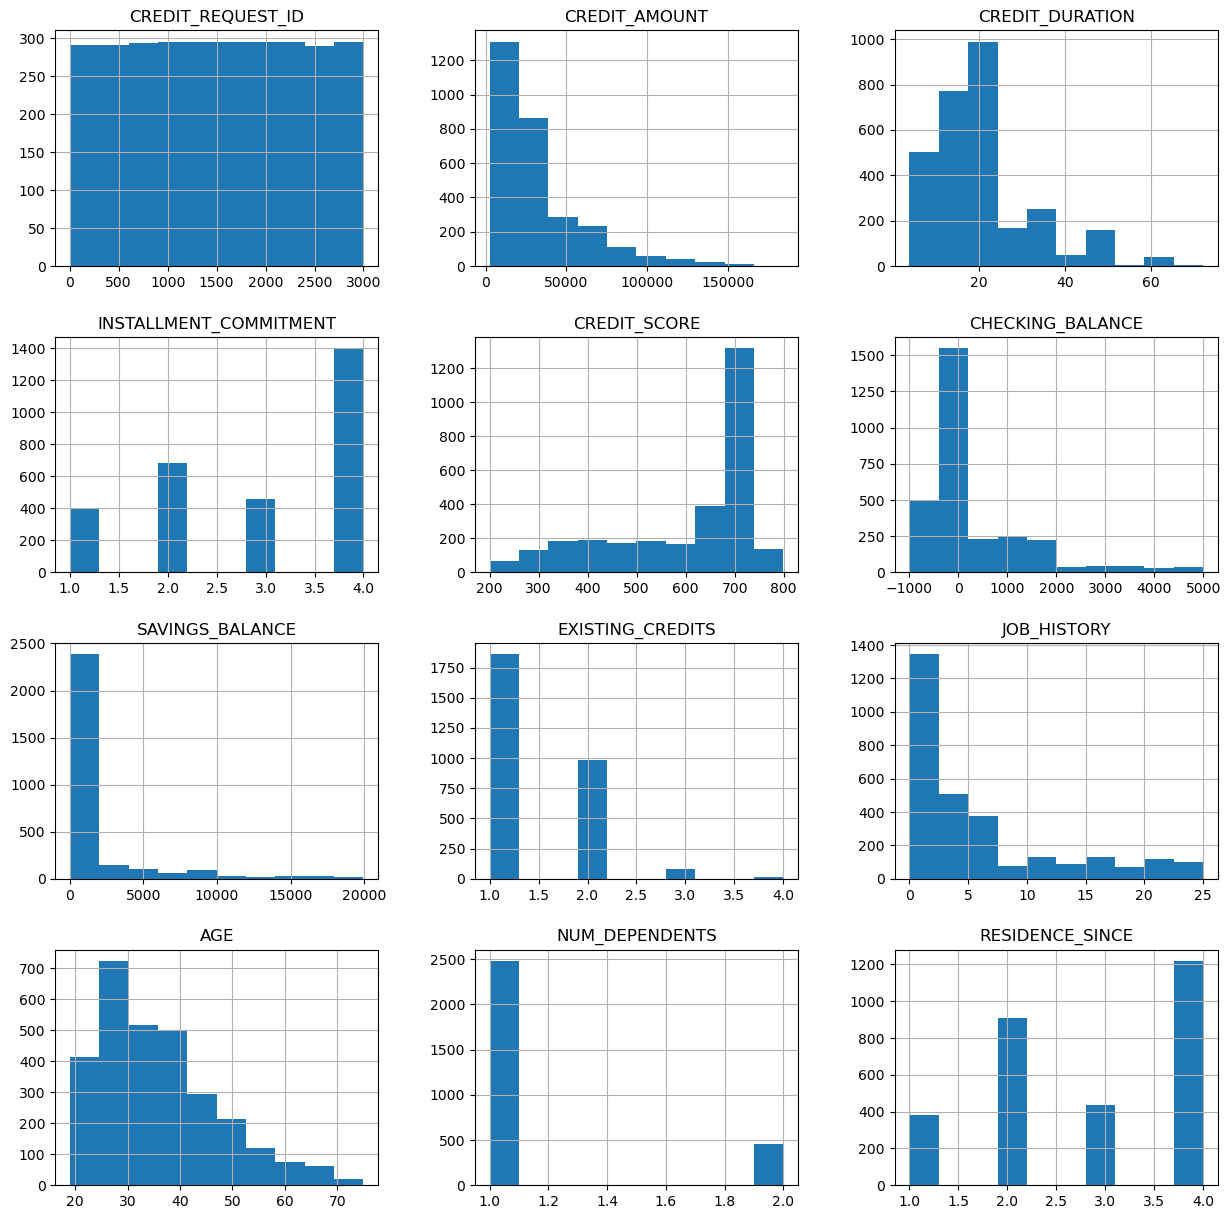

In [11]:
#to check the numerical distribution of values


credits_df.to_pandas().hist(figsize=(15,15))

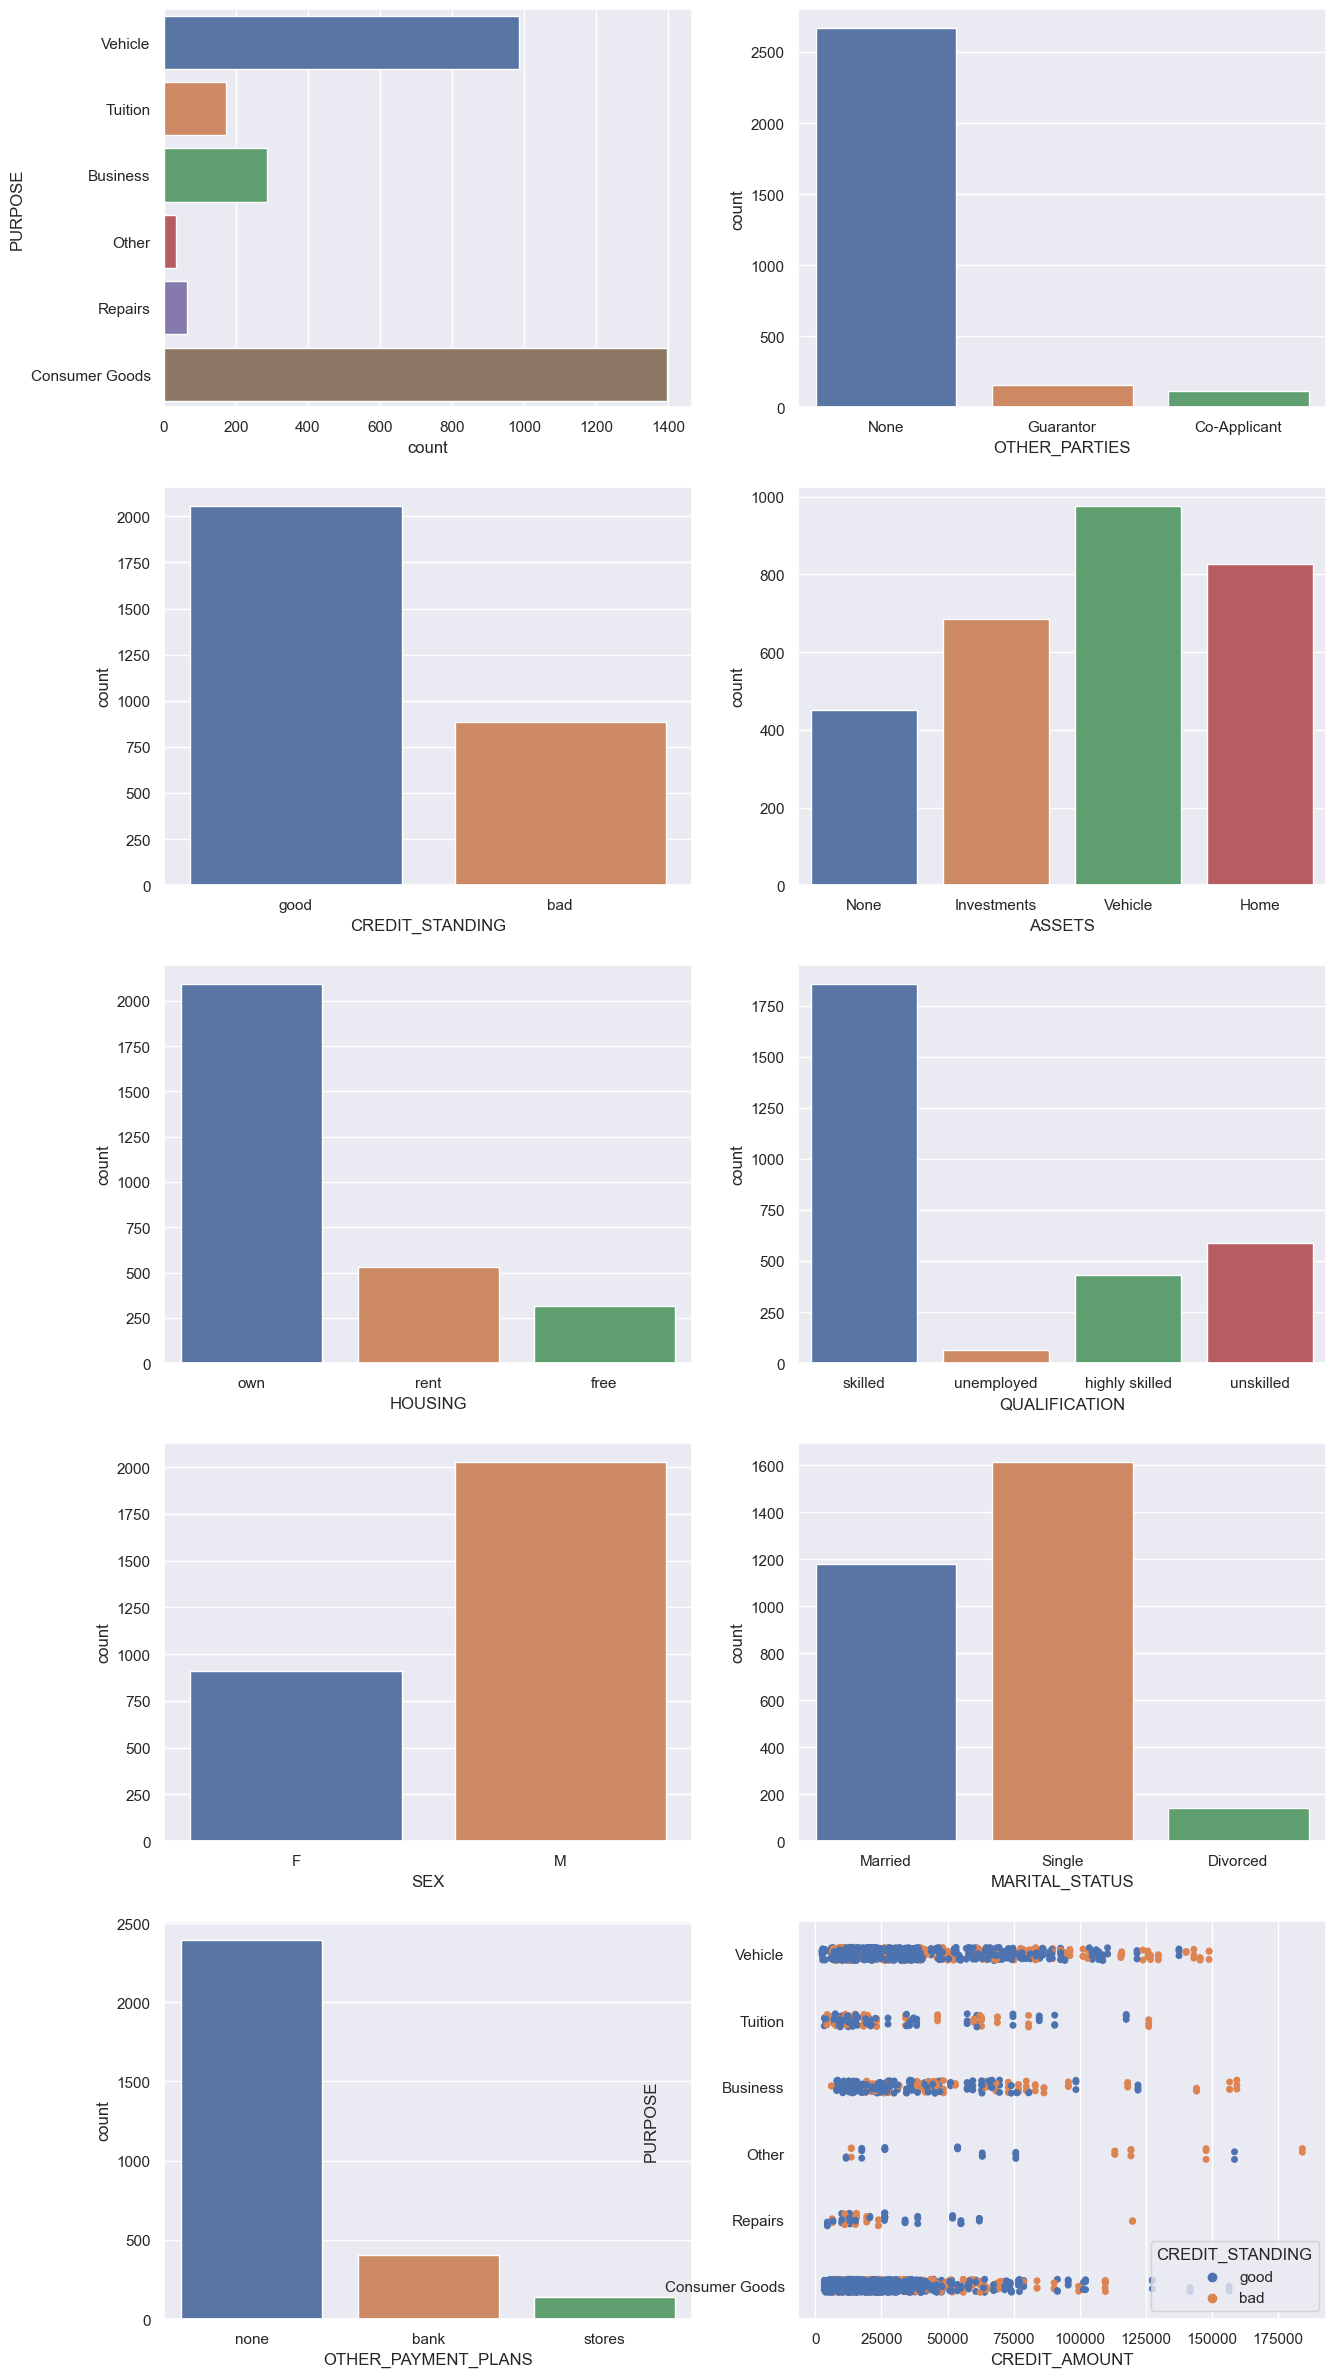

In [12]:
# visualize the categorical columns

sns.set(style='darkgrid')



fig,axs=plt.subplots(5,2,figsize=(15,30))
df=credits_df.to_pandas()

sns.countplot(data=df,y='PURPOSE',ax=axs[0,0])
sns.countplot(data=df,x='OTHER_PARTIES',ax=axs[0,1])
sns.countplot(data=df,x='CREDIT_STANDING',ax=axs[1,0])
sns.countplot(data=df,x='ASSETS',ax=axs[1,1])
sns.countplot(data=df,x='HOUSING',ax=axs[2,0])
sns.countplot(data=df,x='QUALIFICATION',ax=axs[2,1])
sns.countplot(data=df,x='SEX',ax=axs[3,0])
sns.countplot(data=df,x='MARITAL_STATUS',ax=axs[3,1])
sns.countplot(data=df,x='OTHER_PAYMENT_PLANS',ax=axs[4,0])
sns.stripplot(x='CREDIT_AMOUNT',y='PURPOSE',data=df,hue='CREDIT_STANDING',jitter=True,ax=axs[4,1])
plt.show()


In [13]:
# querrying through snowpark API

# we can use snowpark API to run querries

# lets see the various categories of the loan and its min, max & avg loan amounts


df_loan_status=credits_df.select(col('PURPOSE'),col('CREDIT_AMOUNT'))\
                         .groupBy(col("PURPOSE"))\
                         .agg([min(col('CREDIT_AMOUNT')).as_('MIN_CRED_AMOUNT'),max(col('CREDIT_AMOUNT')).as_('MAX_CRED_AMOUNT'),
                        avg(col("CREDIT_AMOUNT")).as_('AVG_CRED_AMOUNT')])\
                         .sort(col('PURPOSE'))

df_loan_status.toPandas()



,PURPOSE,MIN_CRED_AMOUNT,MAX_CRED_AMOUNT,AVG_CRED_AMOUNT
0,Business,6090,159450,41863.146853
1,Consumer Goods,3380,156530,26791.788269
2,Other,11640,184240,78815.454545
3,Repairs,4540,119980,25854.769231
4,Tuition,3390,126120,29122.965116
5,Vehicle,2500,148960,37633.569980


# Data Transformation 

In [14]:
# encoding the categorical values into numerical

# using python UDF and leveraging snowflake compute

session.sql("create or replace stage fnstage encryption = (type ='SNOWFLAKE_SSE' )").collect()


[Row(status='Stage area FNSTAGE successfully created.')]

In [15]:
@udf(name='PURPOSE_Encode',is_permanent=True, stage_location ='@fnstage',replace=True, session=session)
def Purpose_Encode(x:str) -> int:
    if x == 'Consumer Goods':
        return 1
    elif x == 'Vehicle':
        return 2
    elif x == 'Tution':
        return 3
    elif x == 'Business':
        return 4
    elif x == 'Repairs':
        return 5
    else:
        return 0
    
    
    
@udf(name ='OTHER_PARTIES_Encode', is_permanent=True, stage_location = '@fnstage',replace=True, session=session)
def Other_Parties_Encode(x:str) -> int:
    if x == 'Guarantor':
        return 1
    elif x == 'Co-Applicant':
        return 2
    else:
        return 0
    

@udf(name ='CREDIT_STANDING_Encode', is_permanent=True, stage_location = '@fnstage',replace=True, session=session)
def Credit_Standing_Encode(x:str) -> int:
    if x == 'good':
        return 1
    else:
        return 0
    
@udf(name='ASSETS_Encode', is_permanent=True, stage_location ='@fnstage',replace=True,session=session)
def Assets_Encode(x:str) -> int:
    if x == 'Vehicle':
        return 1
    elif x == 'Investments':
        return 2
    elif x == 'Home':
        return 3
    else:
        return 0
    
    
@udf(name='HOUSING_Encode', is_permanent=True, stage_location ='@fnstage',replace=True,session=session)
def Housing_Encode(x:str) -> int:
    if x == 'rent':
        return 1
    elif x == 'own':
        return 2
    else:
        return 0
    
    
@udf(name='QUALIFICATION_Encode', is_permanent=True, stage_location ='@fnstage',replace=True,session=session)
def Qualification_Encode(x:str) -> int:
    if x == 'unskilled':
        return 1
    elif x == 'skilled':
        return 2
    elif x == 'highly skilled':
        return 3
    else:
        return 0
    
    
    
@udf(name='SEX_Encode', is_permanent=True, stage_location ='@fnstage',replace=True,session=session)
def Sex_Encode(x:str) -> int:
    if x == 'M':
        return 1
    else:
        return 0
    

    
@udf(name='MARITAL_STATUS_Encode', is_permanent=True, stage_location ='@fnstage',replace=True,session=session)
def Marital_Status_Encode(x:str) -> int:
    if x == 'Married':
        return 1
    elif x == 'Single':
        return 2
    else:
        return 0
    
    
    
@udf(name='OTHER_PAYMENT_PLANS_Encode', is_permanent=True, stage_location ='@fnstage',replace=True,session=session)
def Other_Payment_Plans_Encode(x:str) -> int:
    if x == 'bank':
        return 1
    elif x == 'stores':
        return 2
    else:
        return 0
    
    
@udf(name='CREDIT_SCORE_Decode', is_permanent=True, stage_location ='@fnstage',replace=True,session=session)
def Credit_Score_Decode(x:int) -> str:
    if x == 1:
        return 'Approved'
    else:
        return 'Denied'

In [16]:
feature_matrix = credits_df.select(
    Purpose_Encode(col('PURPOSE')).as_('PURPOSE_CODE'),
    Qualification_Encode(col('QUALIFICATION')).as_('QUALIFICATION_CODE'),
    Other_Parties_Encode(col('OTHER_PARTIES')).as_('OTHER_PARTIES_CODE'),
    Other_Payment_Plans_Encode(col('OTHER_PAYMENT_PLANS')).as_('OTHER_PAYMENT_PLANS_CODE'),
    Housing_Encode(col('HOUSING')).as_('HOUSING_CODE'),
    Assets_Encode(col('ASSETS')).as_('ASSETS_CODE'),
    Sex_Encode(col('SEX')).as_('SEX_CODE'),
    Marital_Status_Encode(col('MARITAL_STATUS')).as_('MARITAL_STATUS_CODE'),
    Credit_Standing_Encode(col('CREDIT_STANDING')).as_('CREDIT_STANDING_CODE'),
    col("CHECKING_BALANCE"),
    col("SAVINGS_BALANCE"),
    col("AGE"),
    col("JOB_HISTORY"),
    col("CREDIT_SCORE"),
    col("CREDIT_DURATION"), 
    col("CREDIT_AMOUNT"),
    col("RESIDENCE_SINCE"),
    col("INSTALLMENT_COMMITMENT"),
    col("NUM_DEPENDENTS"),
    col("EXISTING_CREDITS")
)

In [17]:
df = feature_matrix.toPandas().astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   PURPOSE_CODE              2940 non-null   int32
 1   QUALIFICATION_CODE        2940 non-null   int32
 2   OTHER_PARTIES_CODE        2940 non-null   int32
 3   OTHER_PAYMENT_PLANS_CODE  2940 non-null   int32
 4   HOUSING_CODE              2940 non-null   int32
 5   ASSETS_CODE               2940 non-null   int32
 6   SEX_CODE                  2940 non-null   int32
 7   MARITAL_STATUS_CODE       2940 non-null   int32
 8   CREDIT_STANDING_CODE      2940 non-null   int32
 9   CHECKING_BALANCE          2940 non-null   int32
 10  SAVINGS_BALANCE           2940 non-null   int32
 11  AGE                       2940 non-null   int32
 12  JOB_HISTORY               2940 non-null   int32
 13  CREDIT_SCORE              2940 non-null   int32
 14  CREDIT_DURATION           2940 non-null 

# Model Training & Testing

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [20]:
x = df.drop(['CREDIT_STANDING_CODE'],axis=1)
y= df['CREDIT_STANDING_CODE']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [22]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [23]:
y_pred = rfc.predict(x_test)

In [25]:
from sklearn.metrics import*
print(confusion_matrix(y_test,y_pred))

[[224  47]
 [  4 607]]


In [26]:
accuracy_score(y_test,y_pred)

0.9421768707482994

In [27]:
# save the trained model for future scoring


from joblib import dump, load

dump(rfc, './credit_score.joblib')


['./credit_score.joblib']

In [28]:
# save the file in snowflake staging area 

session.file.put('credit_score.joblib', '@fnstage', auto_compress=False, overwrite=True)

[PutResult(source='credit_score.joblib', target='credit_score.joblib', source_size=3972185, target_size=3972185, source_compression='NONE', target_compression='NONE', status='UPLOADED', message='')]

In [29]:
import os

file_path = './credit_score.joblib'
if os.path.exists(file_path):
    print(f"The file {file_path} exists.")
else:
    print(f"The file {file_path} does not exist.")

The file ./credit_score.joblib exists.


In [30]:
session.clear_imports()
session.add_import("@fnstage/credit_score.joblib")

In [31]:
# export the trained model within UDF

@udf(name = 'credit_score', is_permanent = True, replace = True, stage_location = '@FNSTAGE', session = session, 
     packages=['joblib', "pandas","scikit-learn==1.2.1"])
def credit_score(arg:list) -> int:
    import sys

    import joblib
    import pandas as pd
   

    IMPORT_DIRECTORY_NAME = "snowflake_import_directory"
    import_dir = sys._xoptions[IMPORT_DIRECTORY_NAME]
    pipe_file = import_dir + 'credit_score.joblib'
    
    pipeline = joblib.load(pipe_file)
    row = pd.DataFrame([arg], columns=[ 'PURPOSE_CODE',
                                        'QUALIFICATION_CODE',
                                        'OTHER_PARTIES_CODE',
                                        'OTHER_PAYMENT_PLANS_CODE',
                                        'HOUSING_CODE',
                                        'ASSETS_CODE',
                                        'SEX_CODE',
                                        'MARITAL_STATUS_CODE',
                                        'CHECKING_BALANCE',
                                        'SAVINGS_BALANCE',
                                        'AGE',
                                        'JOB_HISTORY',
                                        'CREDIT_SCORE',
                                        'CREDIT_DURATION',
                                        'CREDIT_AMOUNT',
                                        'RESIDENCE_SINCE',
                                        'INSTALLMENT_COMMITMENT',
                                        'NUM_DEPENDENTS',
                                        'EXISTING_CREDITS'])           
    return pipeline.predict(row)[0]

# SCORING

In [ ]:
# lets use the customer credit request file so to decide Aprrove / Deny

In [32]:
df_cred_req = session.table('CREDIT_REQUESTS')

In [33]:
df_cred_req.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CREDIT_REQUEST_ID       60 non-null     int16  
 1   CREDIT_AMOUNT           60 non-null     int32  
 2   CREDIT_DURATION         60 non-null     int8   
 3   PURPOSE                 60 non-null     object 
 4   INSTALLMENT_COMMITMENT  60 non-null     int8   
 5   OTHER_PARTIES           60 non-null     object 
 6   CREDIT_SCORE            60 non-null     int16  
 7   CHECKING_BALANCE        60 non-null     float64
 8   SAVINGS_BALANCE         60 non-null     float64
 9   EXISTING_CREDITS        60 non-null     int8   
 10  ASSETS                  60 non-null     object 
 11  HOUSING                 60 non-null     object 
 12  QUALIFICATION           60 non-null     object 
 13  JOB_HISTORY             60 non-null     int8   
 14  AGE                     60 non-null     int8

In [34]:
df_cred_req.toPandas()

,CREDIT_REQUEST_ID,CREDIT_AMOUNT,CREDIT_DURATION,PURPOSE,INSTALLMENT_COMMITMENT,OTHER_PARTIES,CREDIT_SCORE,CHECKING_BALANCE,SAVINGS_BALANCE,EXISTING_CREDITS,ASSETS,HOUSING,QUALIFICATION,JOB_HISTORY,AGE,SEX,MARITAL_STATUS,NUM_DEPENDENTS,RESIDENCE_SINCE,OTHER_PAYMENT_PLANS
0,182,44550,36,Business,2,None,656,259.00,628.00,2,Home,own,highly skilled,1,30,M,Divorced,1,2,stores
1,188,11750,16,Vehicle,2,None,549,1892.00,723.00,3,Vehicle,free,unemployed,0,68,M,Single,1,3,none
2,122,38680,24,Vehicle,4,None,356,0.00,586.00,2,Vehicle,rent,highly skilled,7,41,F,Married,1,2,none
3,245,34470,12,Tuition,4,None,749,0.00,8102.00,1,Home,own,unskilled,1,35,F,Married,2,3,none
4,447,18420,36,Vehicle,4,None,672,-463.77,428.00,1,Vehicle,own,skilled,1,34,F,Married,1,4,none
5,581,10560,18,Vehicle,3,Guarantor,479,1676.00,365.00,2,Home,own,skilled,18,36,M,Single,1,3,bank
6,716,75960,30,Vehicle,1,None,327,0.00,0.00,2,Vehicle,own,skilled,10,63,M,Single,1,4,none
7,285,38780,24,Vehicle,4,None,543,1555.00,1885.00,1,Vehicle,own,skilled,1,37,M,Divorced,1,2,none
8,328,15250,24,Vehicle,4,None,676,0.00,11818.00,1,Vehicle,own,skilled,5,34,F,Married,2,3,none
9,488,37570,24,Vehicle,4,Co-Applicant,716,0.00,493.00,1,None,free,skilled,12,62,F,Married,1,4,none


In [36]:
# Stored procedure 


session.add_packages('snowflake-snowpark-python')

@sproc(name="process_credit_requests", replace=True, is_permanent=True, stage_location="@fnstage",session=session)
def process_credit_requests_fn (session: snowflake.snowpark.Session, credit_requests: str, credit_assessment: str) -> int:
    
    #Build the input features for the model using the Snowpark API as well as the Python UDFs for encoding.
    df_cred_req = session.table(credit_requests).select( 
                            col("CREDIT_REQUEST_ID"), col("PURPOSE"), 
                            Purpose_Encode(col("PURPOSE")).as_("PURPOSE_CODE"),
                            Qualification_Encode(col("QUALIFICATION")).as_("QUALIFICATION_CODE"),
                            Other_Parties_Encode(col("OTHER_PARTIES")).as_("OTHER_PARTIES_CODE"),
                            Other_Payment_Plans_Encode(col("OTHER_PAYMENT_PLANS")).as_("OTHER_PAYMENT_PLANS_CODE"),
                            Housing_Encode(col("HOUSING")).as_("HOUSING_CODE"),
                            col('ASSETS'),
                            Assets_Encode(col("ASSETS")).as_("ASSETS_CODE"),
                            Sex_Encode(col("SEX")).as_("SEX_CODE"),
                            Marital_Status_Encode(col("MARITAL_STATUS")).as_("MARITAL_STATUS_CODE"),
                            col("CHECKING_BALANCE"),
                            col("SAVINGS_BALANCE"),
                            col("AGE"),
                            col("JOB_HISTORY"),
                            col("CREDIT_SCORE"),
                            col("CREDIT_DURATION"), 
                            col("CREDIT_AMOUNT"), 
                            col("RESIDENCE_SINCE"),
                            col("INSTALLMENT_COMMITMENT"),
                            col("NUM_DEPENDENTS"),
                            col("EXISTING_CREDITS")
                         )
    #Call the UDF to score the existing credit requests read previously    
    input_features = [ 'PURPOSE_CODE',
                   'QUALIFICATION_CODE',
                   'OTHER_PARTIES_CODE',
                   'OTHER_PAYMENT_PLANS_CODE',
                   'HOUSING_CODE',
                   'ASSETS_CODE',
                   'SEX_CODE',
                   'MARITAL_STATUS_CODE',
                   'CHECKING_BALANCE',
                   'SAVINGS_BALANCE',
                   'AGE',
                   'JOB_HISTORY',
                   'CREDIT_SCORE',
                   'CREDIT_DURATION',
                   'CREDIT_AMOUNT',
                   'RESIDENCE_SINCE',
                   'INSTALLMENT_COMMITMENT',
                   'NUM_DEPENDENTS',
                   'EXISTING_CREDITS']           

    df_assessment = df_cred_req.select(col("CREDIT_REQUEST_ID"), col("PURPOSE"), col("CREDIT_AMOUNT"), col("CREDIT_DURATION"), col("CREDIT_SCORE"),col('ASSETS'),col("EXISTING_CREDITS"),
                    call_udf("Credit_Score_Decode",(call_udf("credit_score", array_construct(*input_features)))).as_("CREDIT_STATUS"))
    
    df_assessment.write.mode("overwrite").saveAsTable(credit_assessment)
    
    #The stored procedure will return the total number of credit request assessed.
    return df_assessment.count()

In [37]:
session.call("process_credit_requests", "credit_requests",'credit_assessment')

60

In [38]:
session.table("credit_assessment").toPandas()

,CREDIT_REQUEST_ID,PURPOSE,CREDIT_AMOUNT,CREDIT_DURATION,CREDIT_SCORE,ASSETS,EXISTING_CREDITS,CREDIT_STATUS
0,581,Vehicle,10560,18,479,Home,2,Approved
1,916,Other,184240,48,278,Investments,1,Denied
2,1073,Other,11640,8,335,None,2,Approved
3,2275,Repairs,119980,30,688,None,1,Denied
4,2111,Business,14490,6,631,Vehicle,2,Approved
5,1296,Consumer Goods,99600,48,682,Vehicle,1,Denied
6,2475,Consumer Goods,12450,18,421,Vehicle,1,Denied
7,122,Vehicle,38680,24,356,Vehicle,2,Approved
8,474,Tuition,12380,6,686,Investments,1,Approved
9,1216,Tuition,9320,6,457,Investments,2,Approved
